In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import imdb
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Загрузим и разобъём датасет IMDB

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=20000)
word_index = imdb.get_word_index()

max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

1641221/1641221 [==============================] - 1s 0us/step


In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
input_dim = 100
encoding_dim = 64

input_layer = Input(shape=(input_dim,))

encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)


autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True)
data_transformed = encoder.predict(X_train)
data_transformed = encoder.predict(X_test)


Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 7966744.5000
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 7966540.5000
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 7966522.5000
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 7966522.0000
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 7966530.0000
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 7966522.0000
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 7966522.5000
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 7966524.0000
Epoch 9/10
625/625 [==============================] - 2s 3ms/step - loss: 7966514.5000
Epoch 10/10
782/782 [==============================] - 1s 1ms/step


In [6]:
model_dense = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=max_len),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_dense.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_cnn = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=max_len),
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(max_len, encoding_dim)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Выполним обучение полносвязной модели

In [7]:
history = model_dense.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
250/250 [==============================] - 4s 10ms/step - loss: 0.4786 - accuracy: 0.7529 - val_loss: 0.3513 - val_accuracy: 0.8405
Epoch 2/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0672 - accuracy: 0.9787 - val_loss: 0.4851 - val_accuracy: 0.8092
Epoch 3/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0037 - accuracy: 0.9998 - val_loss: 0.5257 - val_accuracy: 0.8310
Epoch 4/10
250/250 [==============================] - 2s 6ms/step - loss: 4.6422e-04 - accuracy: 1.0000 - val_loss: 0.5409 - val_accuracy: 0.8355
Epoch 5/10
250/250 [==============================] - 2s 7ms/step - loss: 2.4573e-04 - accuracy: 1.0000 - val_loss: 0.5554 - val_accuracy: 0.8353
Epoch 6/10
250/250 [==============================] - 2s 7ms/step - loss: 1.6246e-04 - accuracy: 1.0000 - val_loss: 0.5680 - val_accuracy: 0.8347
Epoch 7/10
250/250 [==============================] - 2s 6ms/step - loss: 1.1523e-04 - accuracy: 1.0000 - val_loss: 0.5788 - val_accura

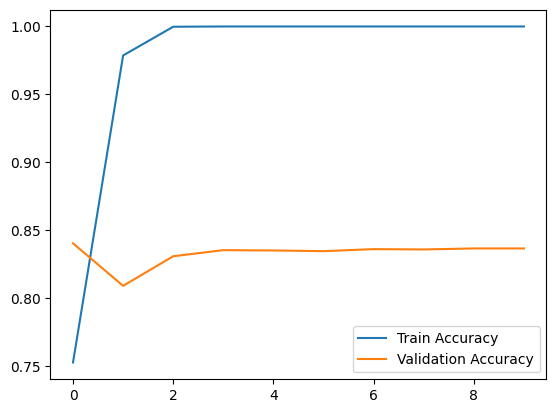

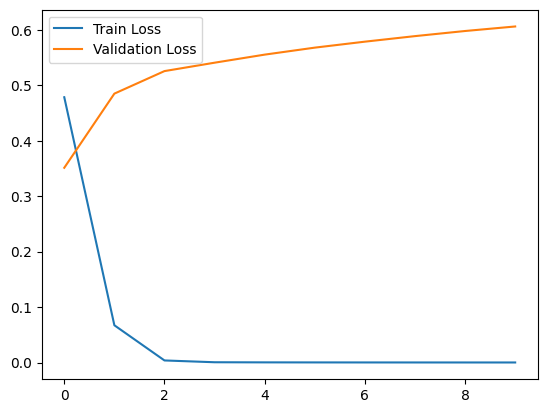

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

Выполним обучение сверточной модели

In [9]:
history_cnn = model_cnn.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
250/250 [==============================] - 3s 8ms/step - loss: 0.5213 - accuracy: 0.7239 - val_loss: 0.3464 - val_accuracy: 0.8490
Epoch 2/10
250/250 [==============================] - 2s 7ms/step - loss: 0.2254 - accuracy: 0.9110 - val_loss: 0.3392 - val_accuracy: 0.8565
Epoch 3/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0952 - accuracy: 0.9706 - val_loss: 0.4174 - val_accuracy: 0.8485
Epoch 4/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0277 - accuracy: 0.9952 - val_loss: 0.5110 - val_accuracy: 0.8455
Epoch 5/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0065 - accuracy: 0.9998 - val_loss: 0.5895 - val_accuracy: 0.8457
Epoch 6/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6442 - val_accuracy: 0.8450
Epoch 7/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.6862 - val_accuracy: 0.8435
Epoch 

In [10]:
y_pred = (model_cnn.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

782/782 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     12500
           1       0.83      0.83      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



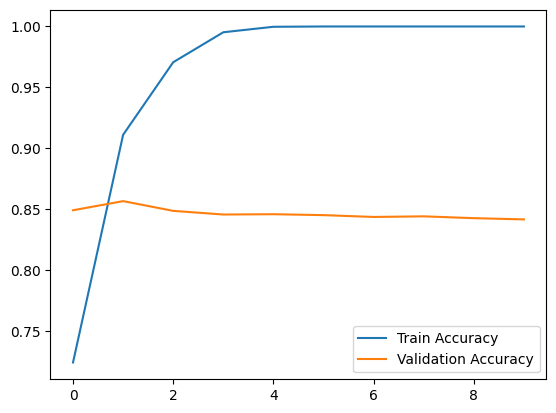

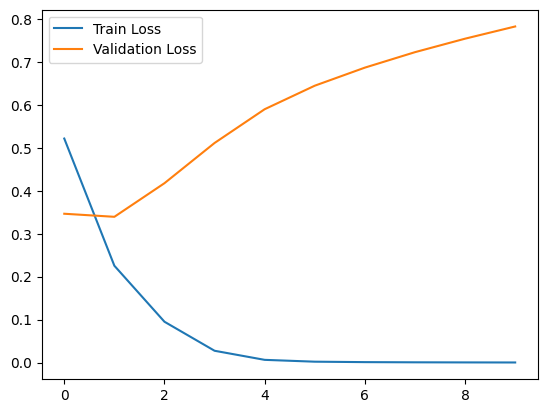

In [11]:
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

Сравним метрики F1, Loss, Accurancy для получившихся моделей

In [12]:
y_pred = (model_dense.predict(X_test) > 0.5).astype("int32")
y_pred_cnn = (model_cnn.predict(X_test) > 0.5).astype("int32")
acc = model_dense.evaluate(X_test, y_test)
acc_cnn = model_cnn.evaluate(X_test, y_test)
f1 = f1_score(y_test, y_pred)
f1_cnn = f1_score(y_test, y_pred_cnn)
print(f"F1 CNN: {f1_cnn}, F1 Dense: {f1}")
print(f"Accurancy CNN: {acc_cnn[1]}, Accurancy Dense: {acc[1]}")
print(f"Loss CNN: {acc_cnn[0]}, Loss Dense: {acc[0]}")

782/782 [==============================] - 3s 4ms/step - loss: 0.7940 - accuracy: 0.8314
F1 CNN: 0.8311979500320308, F1 Dense: 0.8308071766718383
Accurancy CNN: 0.8313599824905396, Accurancy Dense: 0.8298799991607666
Loss CNN: 0.7939724326133728, Loss Dense: 0.6398682594299316


Сверточная модельполучает результат лучше, нежели полносвязная